# EDA Notebook — BCG X Task 2

This notebook starts from the **starter template provided** and extends it with additional EDA steps focused on understanding drivers of churn (price sensitivity, consumption, margins, and customer service channels). It expects `client_data.csv` and `price_data.csv` in the same folder as the notebook. The code includes fallbacks to the uploaded filenames if needed.

In [2]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

# Set plot style
sns.set(color_codes=True)


In [1]:
# Load data from ./data/ folder (simplified)
from pathlib import Path

client_path = "../data/client_data.csv"
price_path = "../data/price_data.csv"

# Confirm files exist
for p in [client_path, price_path]:
    if not Path(p).exists():
        raise FileNotFoundError(f"Required file not found: {p}. Please check the ./data/ folder.")

print("Using:", client_path, price_path)

client_df = pd.read_csv(client_path)
price_df = pd.read_csv(price_path)

# Quick head
display(client_df.head(3))
display(price_df.head(3))


Using: ../data/client_data.csv ../data/price_data.csv


NameError: name 'pd' is not defined

In [5]:
# Data types and quick stats
print("Client data info:")
client_df.info()
print("\nPrice data info:")
price_df.info()

print("\nNumerical description for client_df:")
display(client_df.describe(include=[np.number]).T)

print("\nCategorical / object counts (sample):")
for col in client_df.select_dtypes(include=['object','bool','category']).columns[:10]:
    print(f"--- {col} ---")
    print(client_df[col].value_counts(dropna=False).head(10))
    print()


Client data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01



Categorical / object counts (sample):
--- id ---
id
563dde550fd624d7352f3de77c0cdfcd    1
24011ae4ebbe3035111d65fa7c15bc57    1
d29c2c54acc38ff3c0614d0a653813dd    1
764c75f661154dac3a6c254cd082ea7d    1
bba03439a292a1e166f80264c16191cb    1
149d57cf92fc41cf94415803a877cb4b    1
1aa498825382410b098937d65c4ec26d    1
7ab4bf4878d8f7661dfc20e9b8e18011    1
01495c955be7ec5e7f3203406785aae0    1
f53a254b1115634330c12c7fdbf7958a    1
Name: count, dtype: int64

--- channel_sales ---
channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

--- date_activ ---
date_activ
2009-08-01    95
2010-02-01    92
2009-09-01    76
2009-10-01    55
2010-01-11    48
2012-02-01    48
2010-01-18    47


In [6]:
# Convert common date columns and categorical flags
date_cols = [c for c in client_df.columns if 'date' in c.lower()]
for c in date_cols:
    try:
        client_df[c] = pd.to_datetime(client_df[c], errors='coerce')
    except Exception as e:
        print("Could not convert", c, e)

# Convert price date
if 'price_date' in price_df.columns:
    price_df['price_date'] = pd.to_datetime(price_df['price_date'], errors='coerce')

# Convert boolean-like columns
bool_like = [c for c in client_df.columns if client_df[c].dropna().isin([0,1]).all() and client_df[c].nunique()<=2]
# keep churn as numeric but show distribution
print("Churn value counts:")
print(client_df['churn'].value_counts(dropna=False))

# Ensure categorical dtype for some columns
cat_cols = ['channel_sales','origin_up','has_gas']
for c in cat_cols:
    if c in client_df.columns:
        client_df[c] = client_df[c].astype('category')

print("\nAfter conversions:")
client_df.info()


Churn value counts:
churn
0    13187
1     1419
Name: count, dtype: int64

After conversions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  category      
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-nu

In [7]:
# Missing values and unique counts
missing = client_df.isnull().sum().sort_values(ascending=False)
display(missing[missing>0])

uniques = client_df.nunique().sort_values()
display(uniques.head(20))


Series([], dtype: int64)

churn                                2
has_gas                              2
origin_up                            6
channel_sales                        8
nb_prod_act                         10
forecast_discount_energy            12
num_years_antig                     13
forecast_price_pow_off_peak         41
forecast_price_energy_peak         329
date_end                           368
date_renewal                       386
forecast_price_energy_off_peak     516
pow_max                            698
date_activ                        1796
cons_gas_12m                      2112
date_modif_prod                   2129
margin_gross_pow_ele              2391
margin_net_pow_ele                2391
forecast_meter_rent_12m           3528
forecast_cons_year                4218
dtype: int64

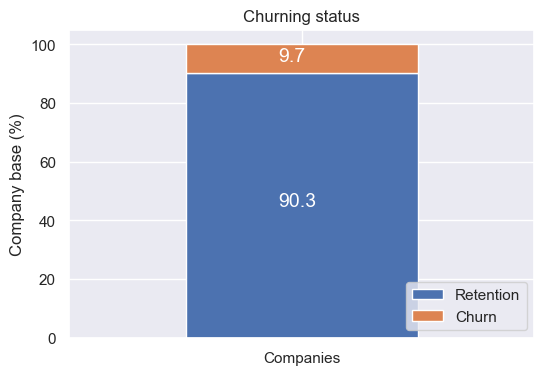

In [8]:
# Helper plotting functions from starter notebook

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    for p in ax.patches:
        value = str(round(p.get_height(),1))
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )
    annotate_stacked_bars(ax, textsize=14)
    plt.legend(["Retention", "Churn"], loc=legend_)
    plt.ylabel("Company base (%)")
    plt.show()

def plot_distribution(dataframe, column, ax, bins_=50):
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain', axis='x')

# Churn overview
churn = client_df[['id', 'churn']].copy()
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (6, 4), legend_="lower right")


In [9]:
# Consumption distributions: cons_12m and cons_last_month if available
cons_cols = [c for c in ['cons_12m','cons_last_month','cons_gas_12m'] if c in client_df.columns]
if len(cons_cols)>0:
    fig, axs = plt.subplots(nrows=len(cons_cols), figsize=(10,4*len(cons_cols)))
    if len(cons_cols)==1:
        axs = [axs]
    for ax,col in zip(axs,cons_cols):
        plot_distribution(client_df, col, ax, bins_=80)
        ax.set_title(f"Distribution of {col} (Retention vs Churn)")
    plt.tight_layout()


min date: 2015-01-01 00:00:00 max date: 2015-12-01 00:00:00


price_date_parsed
2015    193002
Name: count, dtype: int64

Rows with out-of-range years: 0 of 193002


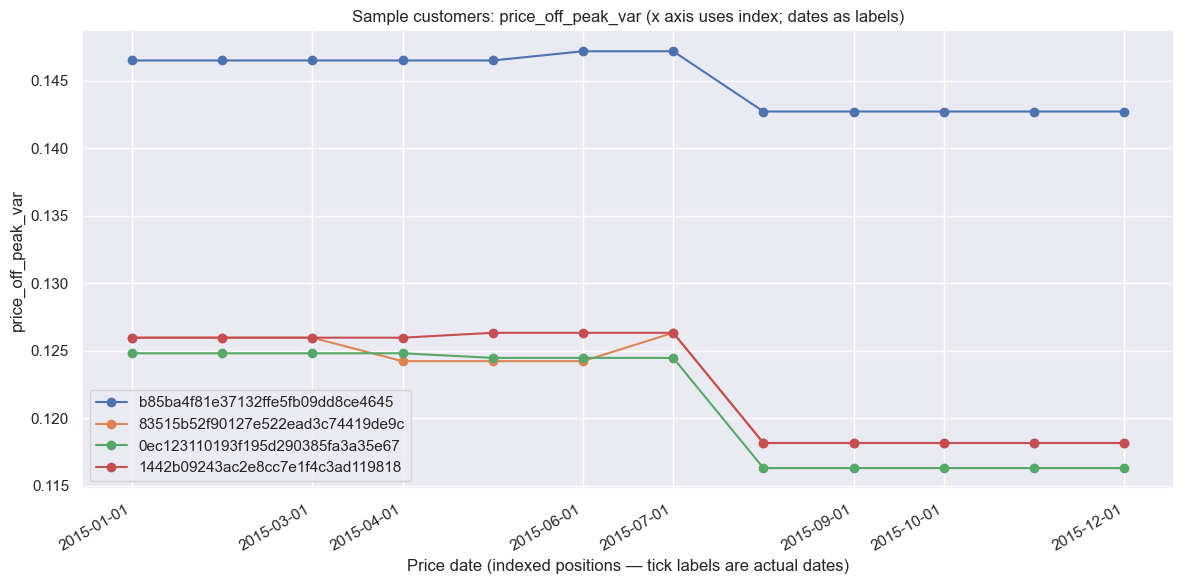

In [13]:
# Safe plotting WITHOUT using Matplotlib date conversion (use string labels)
from datetime import datetime

# Ensure price_date_parsed exists and is datetime
if 'price_date_parsed' not in price_df.columns:
    price_df['price_date_parsed'] = pd.to_datetime(price_df['price_date'], errors='coerce', infer_datetime_format=True)

# Diagnostics: show min/max and some suspicious extremes
valid_dates = price_df['price_date_parsed'].dropna()
if not valid_dates.empty:
    print("min date:", valid_dates.min(), "max date:", valid_dates.max())
    # show years distribution head
    yrs = valid_dates.dt.year.value_counts().sort_index()
    display(yrs.head(10))
else:
    print("No parsed dates available at all.")

# Keep only rows with reasonable years (safe window)
min_year, max_year = 1900, 2100
price_df['year_ok'] = price_df['price_date_parsed'].dt.year.between(min_year, max_year)
n_bad = (~price_df['year_ok']).sum()
print(f"Rows with out-of-range years: {n_bad} of {len(price_df)}")
if n_bad>0:
    display(price_df.loc[~price_df['year_ok'], ['price_date','price_date_parsed']].drop_duplicates().head(20))

df_clean = price_df[price_df['year_ok']].copy()
if df_clean.empty:
    print("No valid rows remain after filtering. Aborting plot.")
else:
    # sample customers
    sample_n = 4
    sample_ids = df_clean['id'].drop_duplicates().sample(min(sample_n, df_clean['id'].nunique()), random_state=42).tolist()
    fig, ax = plt.subplots(figsize=(12,6))
    for pid in sample_ids:
        tmp = df_clean[df_clean['id']==pid].sort_values('price_date_parsed')
        if tmp.empty or 'price_off_peak_var' not in tmp.columns:
            continue
        # x numeric positions
        x = range(len(tmp))
        y = tmp['price_off_peak_var'].astype(float, errors='ignore').values
        ax.plot(x, y, marker='o', label=str(pid))
        # prepare a small set of tick labels from dates (pick up to 6 evenly spaced)
        n = len(tmp)
        tick_idx = list({0, n-1} | set((np.linspace(0, n-1, min(6, n)).round().astype(int)).tolist()))
        tick_idx = sorted([i for i in tick_idx if 0 <= i < n])
        tick_labels = [tmp['price_date_parsed'].iloc[i].strftime('%Y-%m-%d') for i in tick_idx]
        # set ticks for this series by adding custom ticks (we'll set global ticks below)
        # To keep axis labels comprehensible, we will set global ticks using the longest series
    # Build global tick positions & labels using the longest series in sample_ids
    longest = None
    maxlen = 0
    for pid in sample_ids:
        l = len(df_clean[df_clean['id']==pid])
        if l > maxlen:
            maxlen = l
            longest = pid
    if longest is not None:
        longest_tmp = df_clean[df_clean['id']==longest].sort_values('price_date_parsed')
        n = len(longest_tmp)
        tick_idx = list({0, n-1} | set((np.linspace(0, n-1, min(8, n)).round().astype(int)).tolist()))
        tick_idx = sorted([i for i in tick_idx if 0 <= i < n])
        global_tick_labels = [longest_tmp['price_date_parsed'].iloc[i].strftime('%Y-%m-%d') for i in tick_idx]
        ax.set_xticks(tick_idx)
        ax.set_xticklabels(global_tick_labels, rotation=30, ha='right')
    ax.set_xlabel('Price date (indexed positions — tick labels are actual dates)')
    ax.set_ylabel('price_off_peak_var')
    ax.set_title('Sample customers: price_off_peak_var (x axis uses index; dates as labels)')
    ax.legend()
    plt.tight_layout()
    plt.show()




C:\Users\Sandeep\AppData\Local\Temp\ipykernel_22136\2850586859.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = client_df.groupby([c,'churn']).size().unstack(fill_value=0)


churn,0,1
channel_sales,,
MISSING,92.402685,7.597315
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
ewpakwlliwisiwduibdlfmalxowmwpci,91.601344,8.398656
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
foosdfpfkusacimwkcsosbicdxkicaua,87.859046,12.140954
lmkebamcaaclubfxadlmueccxoimlema,94.411286,5.588714
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000
usilxuppasemubllopkaafesmlibmsdf,89.963636,10.036364


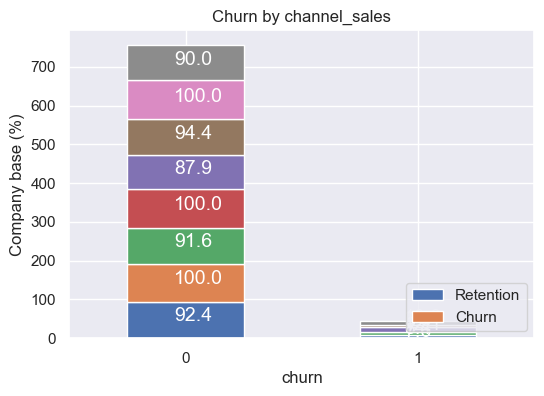

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_22136\2850586859.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = client_df.groupby([c,'churn']).size().unstack(fill_value=0)


churn,0,1
has_gas,,
f,89.945629,10.054371
t,91.814410,8.185590


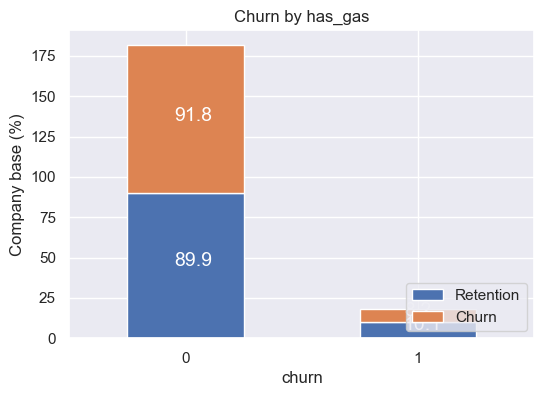

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_22136\2850586859.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = client_df.groupby([c,'churn']).size().unstack(fill_value=0)


churn,0,1
origin_up,,
MISSING,93.750000,6.250000
ewxeelcelemmiwuafmddpobolfuxioce,100.000000,0.000000
kamkkxfxxuwbdslkwifmmcsiusiuosws,93.991616,6.008384
ldkssxwpmemidmecebumciepifcamkci,91.613723,8.386277
lxidpiddsbxsbosboudacockeimpuepw,87.417219,12.582781
usapbepcfoloekilkwsdiboslwaxobdp,100.000000,0.000000


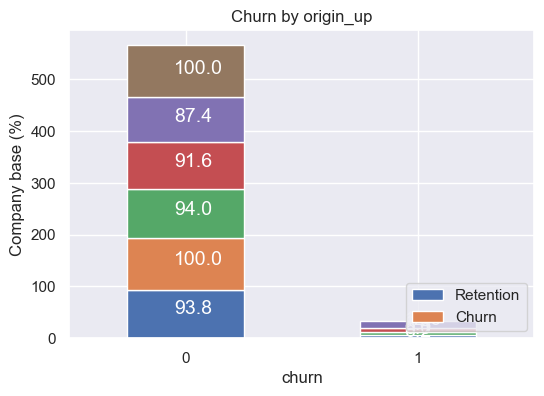

In [14]:
# Churn by category for a few categorical columns
cat_cols = [c for c in ['channel_sales','has_gas','origin_up'] if c in client_df.columns]
for c in cat_cols:
    temp = client_df.groupby([c,'churn']).size().unstack(fill_value=0)
    # convert to percentage
    temp_pct = temp.div(temp.sum(axis=1), axis=0)*100
    display(temp_pct)
    plot_stacked_bars(temp_pct.transpose(), f"Churn by {c}", (6,4), legend_='lower right')


margin_net_pow_ele                0.095772
margin_gross_pow_ele              0.095725
forecast_meter_rent_12m           0.044245
net_margin                        0.041135
pow_max                           0.030362
forecast_price_energy_peak        0.029315
forecast_discount_energy          0.017026
forecast_price_pow_off_peak       0.014778
forecast_cons_12m                 0.012949
imp_cons                         -0.001583
forecast_cons_year               -0.002558
forecast_price_energy_off_peak   -0.010837
nb_prod_act                      -0.014930
cons_gas_12m                     -0.037957
cons_last_month                  -0.045284
cons_12m                         -0.045968
num_years_antig                  -0.074140
dtype: float64

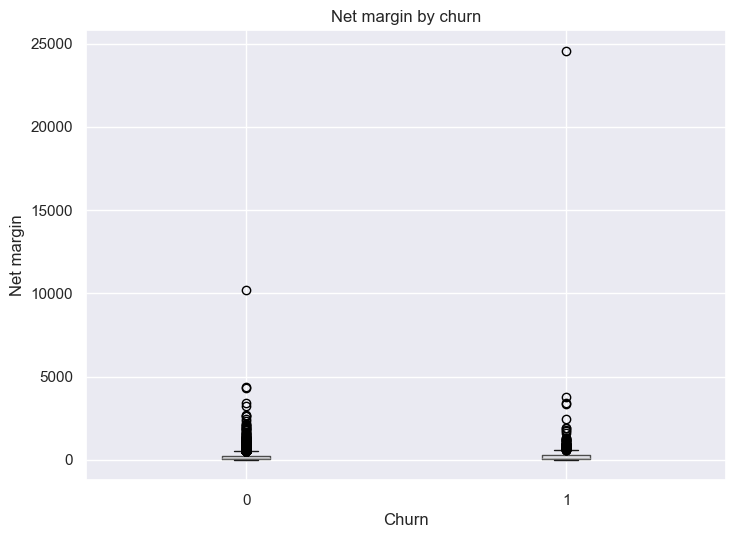

In [15]:
# Correlation of numeric features vs churn (point biserial via corr with churn)
num = client_df.select_dtypes(include=[np.number]).drop(columns=['churn'], errors='ignore')
if 'churn' in client_df.columns:
    corr_with_churn = num.apply(lambda x: x.corr(client_df['churn']))
    display(corr_with_churn.sort_values(ascending=False).head(20))

# Boxplot example: net_margin (if exists) by churn
if 'net_margin' in client_df.columns:
    fig, ax = plt.subplots(figsize=(8,6))
    client_df.boxplot(column='net_margin', by='churn', ax=ax)
    plt.title("Net margin by churn")
    plt.suptitle('')
    plt.xlabel("Churn")
    plt.ylabel("Net margin")
    plt.show()


## Next steps

- Feature engineering (tenure, avg monthly consumption, price change exposure)
- Statistical tests to validate price sensitivity hypothesis (t-tests, regression coefficients)
- Build predictive models (logistic regression, tree-based) and measure feature importance

---

**File saved:** `EDA_BCGX_Task2.ipynb`